<a href="https://colab.research.google.com/github/sivajivasantha/MassMailDispatcher/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
BASE_DIR  ='/content/UTKFace'
age_labels =[]
gender_labels =[]
image_paths =[]

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path=os.path.join(BASE_DIR,image)
  img_components=image.split('_')
  age_label=int(img_components[0])
  gender_label=int(img_components[1])


  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)} , Number of image_paths:{len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708 , Number of image_paths:23708


In [ ]:
gender_mapping={
    1: 'Female',
    0: 'Male'
}

In [ ]:
import pandas as pd
df =pd.DataFrame()
df['image_pat'],df['age'],df['gender'] =image_paths, age_labels, gender_labels
df.head(5)

,image_pat,age,gender
0,/content/UTKFace/32_0_1_20170109003627385.jpg....,32,0
1,/content/UTKFace/1_0_0_20170110213223460.jpg.c...,1,0
2,/content/UTKFace/23_1_4_20170117194147485.jpg....,23,1
3,/content/UTKFace/23_0_4_20170116221049556.jpg....,23,0
4,/content/UTKFace/30_0_0_20170116215546940.jpg....,30,0


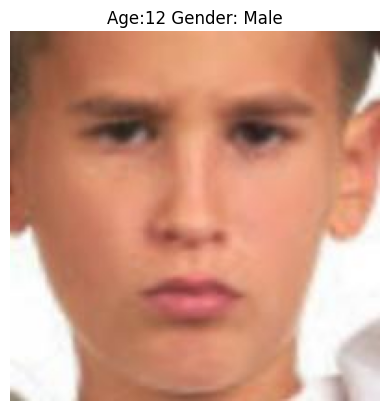

In [ ]:
from PIL import Image

rand_index = random.randint(0,len(image_paths))
age = df['age'][rand_index]
gender =df['gender'][rand_index]
IMG = Image.open(image_paths[rand_index])
plt.title(f'Age:{age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

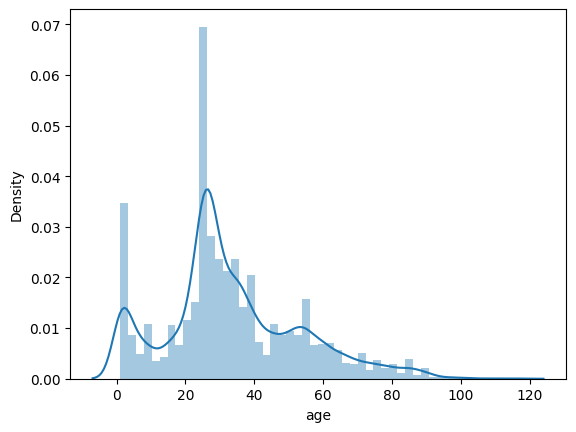

In [ ]:
sns.distplot(df['age'])

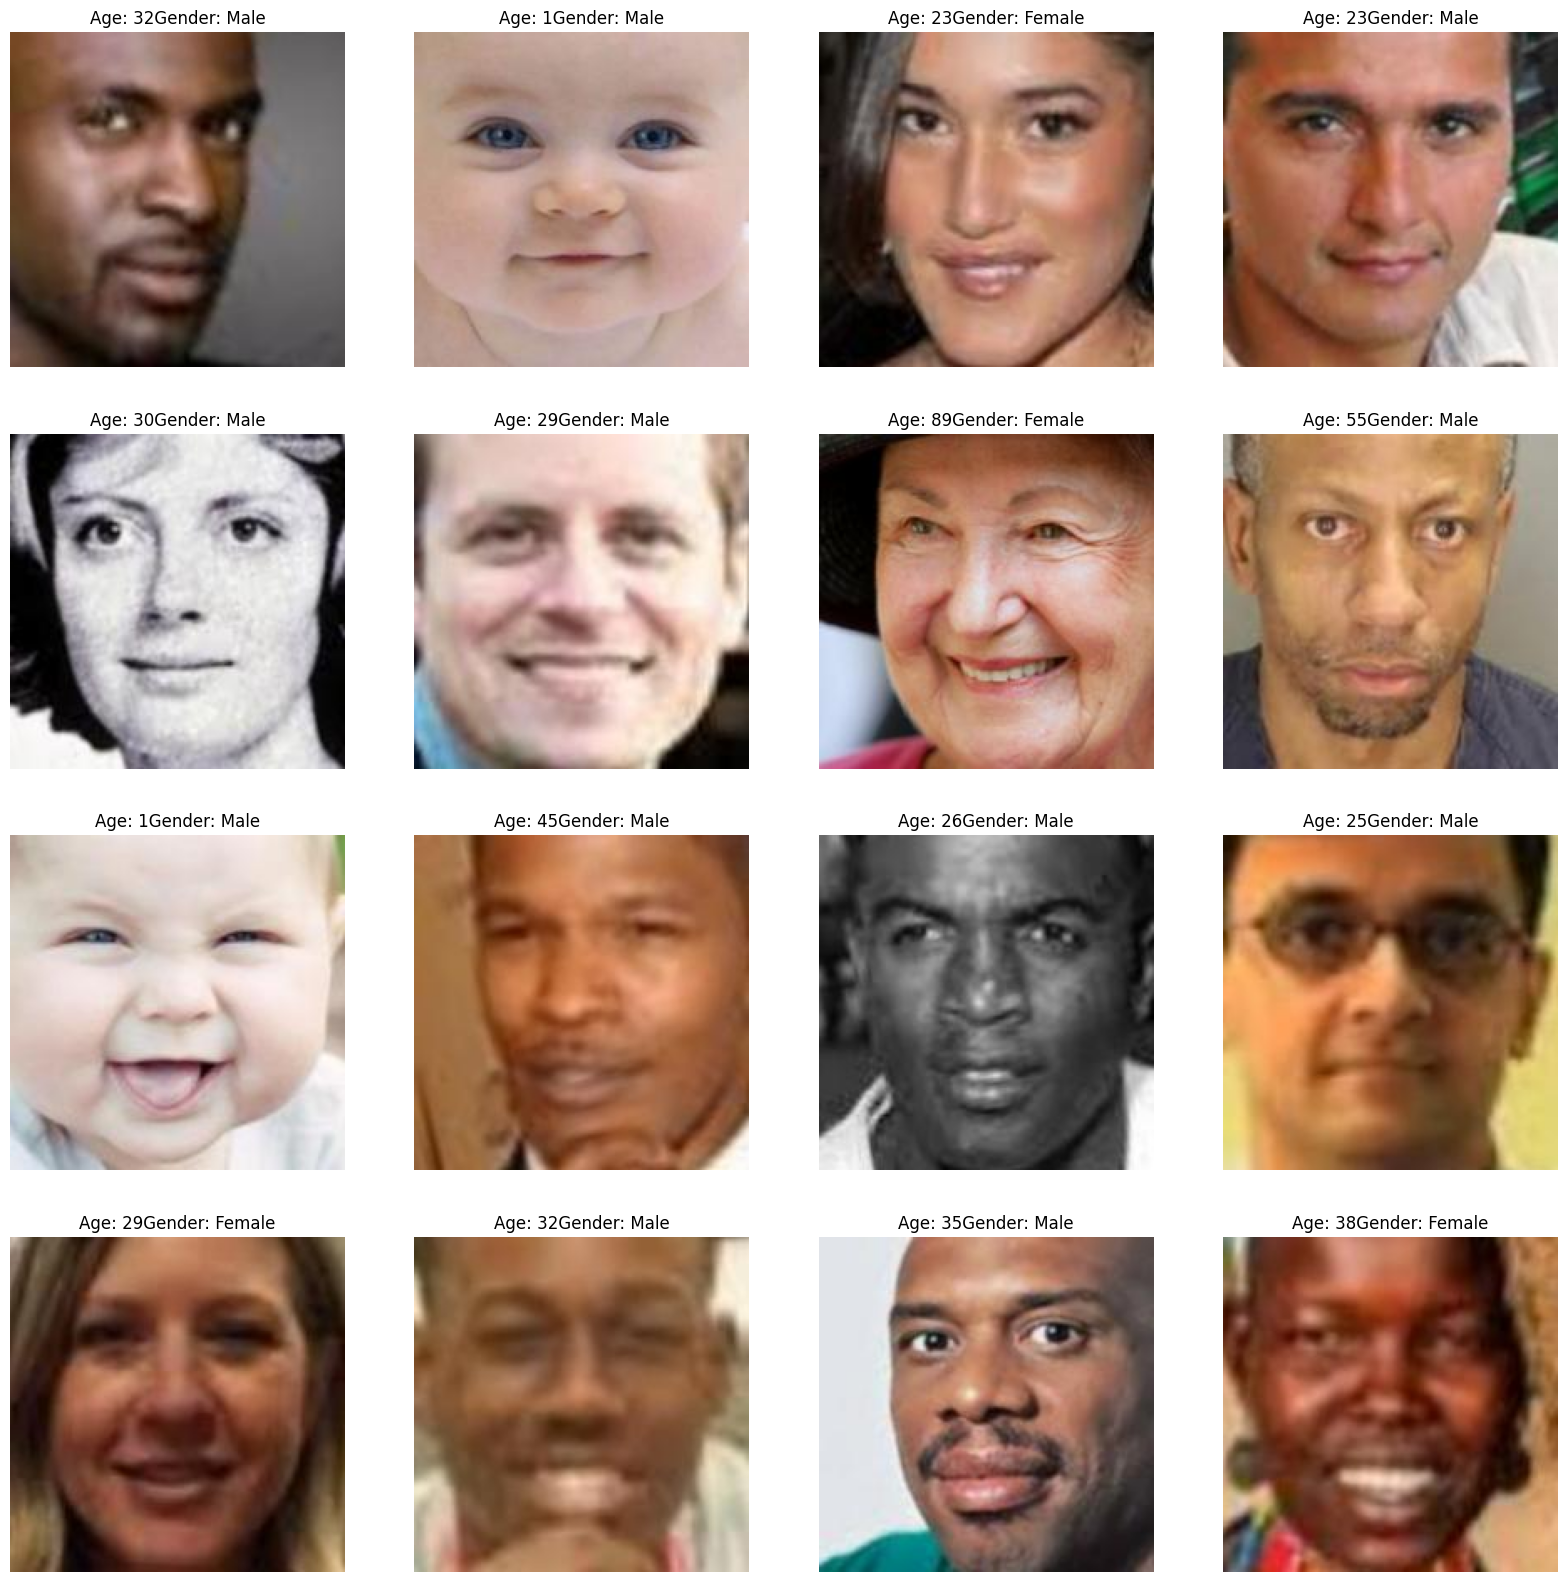

In [ ]:
plt.figure(figsize=(20,20))
samples =df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
  plt.subplot(4,4,index+1)
  img =load_img(sample)
  img=np.array(img)
  plt.axis('off')
  plt.title(f'Age: {age}Gender: {gender_mapping[gender]}')
  plt.imshow(img)

In [ ]:
def extract_image_features(images):
  features = list()

  for image in tqdm(images):
    img = load_img.resize((128,128), Image.ANTIALIAS)
    img =np.array(img)
    features.appends(img)

  features = np.array(features)
  features = features.reshape(len(features),128,128,1)
  return features

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing image paths
df = pd.read_csv('your_data.csv')

# Now you can use the DataFrame df in your function call
X = extract_image_features(df['images_paths'])


NameError: name 'df' is not defined

In [ ]:
X.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.2 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MTN_LOG_LEVEL']='2'

In [ ]:
img=cv.imread("/content/drive/MyDrive/Face Recognition/datacollection/face_recognition/sivaji .jpeg")
#opencv BGR channel format and plt reads images as RGB channel formet

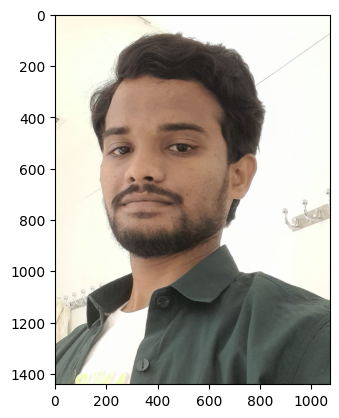

In [ ]:
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) #RGB

In [ ]:
from mtcnn.mtcnn import MTCNN
detector =MTCNN()
results=detector.detect_faces(img)

1/1 [==============================] - 0s 149ms/step


In [ ]:
results

[{'box': [160, 247, 498, 640],
  'confidence': 0.9999907612800598,
  'keypoints': {'left_eye': (264, 533),
   'right_eye': (491, 520),
   'nose': (327, 621),
   'mouth_left': (265, 753),
   'mouth_right': (467, 741)}}]

In [ ]:
x,y,w,h=results[0]['box']

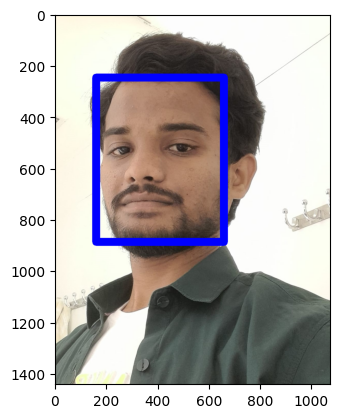

In [ ]:
img=cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),30)
plt.imshow(img)

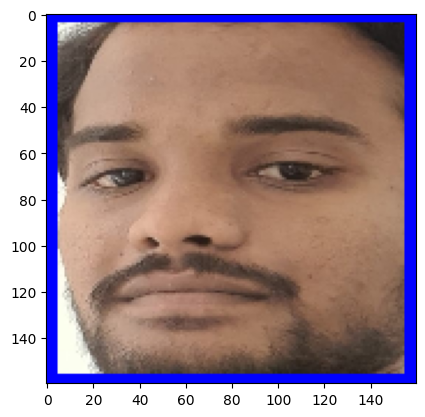

In [ ]:
my_face=img[y:y+h,x:x+w]
#facenet tasks as input 160x160
my_face=cv.resize(my_face,(160,160))
plt.imshow(my_face)

Automatic Process


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
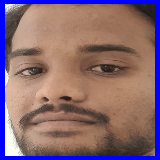

In [ ]:
my_face

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory=directory
        self.target_size=(160,160)
        self.x=[]
        self.y=[]
        self.detector=MTCNN()



    def extract_face(self,filename):
        img=cv.imread(filename)
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        x,y,w,h=detector.detect_faces(img)[0]['box']
        x,y=abs(x),abs(y)
        face=img[y:y+h,x:x+w]
        face_arr=cv.resize(face,self.target_size)
        return face_arr


    def load_faces(self,dir):
        FACES=[]
        for im_name in os.listdir(dir):
            try:
                path=dir+im_name
                single_face=self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES


    def load_classes(self) :
        for sub_dir in os.listdir(self.directory):
            path=self.directory +'/'+ sub_dir+'/'
            FACES=self.load_faces(path)
            labels=[sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.x.extended(FACES)
            self.y.extended(labels)

        return np.asarray(self.x),np.asarray(self.y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(x):
            ncols=3
            nrows=len(y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')







In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/Face Recognition/datacollection")
x, y = faceloading.load_classes()



Loaded successfully: 0


AttributeError: 'list' object has no attribute 'extended'

In [ ]:
!pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet
embedder=FaceNet()

def get_embedding(face_img):
  face_img=face_img.astype('float32')#3D(160x160x3)
  face_img=np.expand_dims(face_img,axis=0)
  #4D(Nonex160x160x3)
  yhat=embedder.embeddings(face_img)
  return yhat[0]#512D image (1x1x512)



In [ ]:
EMBEDDED_x = []


for img in x:
    EMBEDDED_x.append(get_embedded(img))
EMBEDDED_x=np.asarray(EMBEDDED_x)

TypeError: 'int' object is not iterable

In [ ]:
np.savez_compressed

<function savez_compressed at 0x7e5dec103870>